<center>
    <h1>Introduction to Storm</h1>
    <h2>Sebastian Junges</h2>
    <h3>using Material by the Storm Developers</h3>
    <br>
    <br>
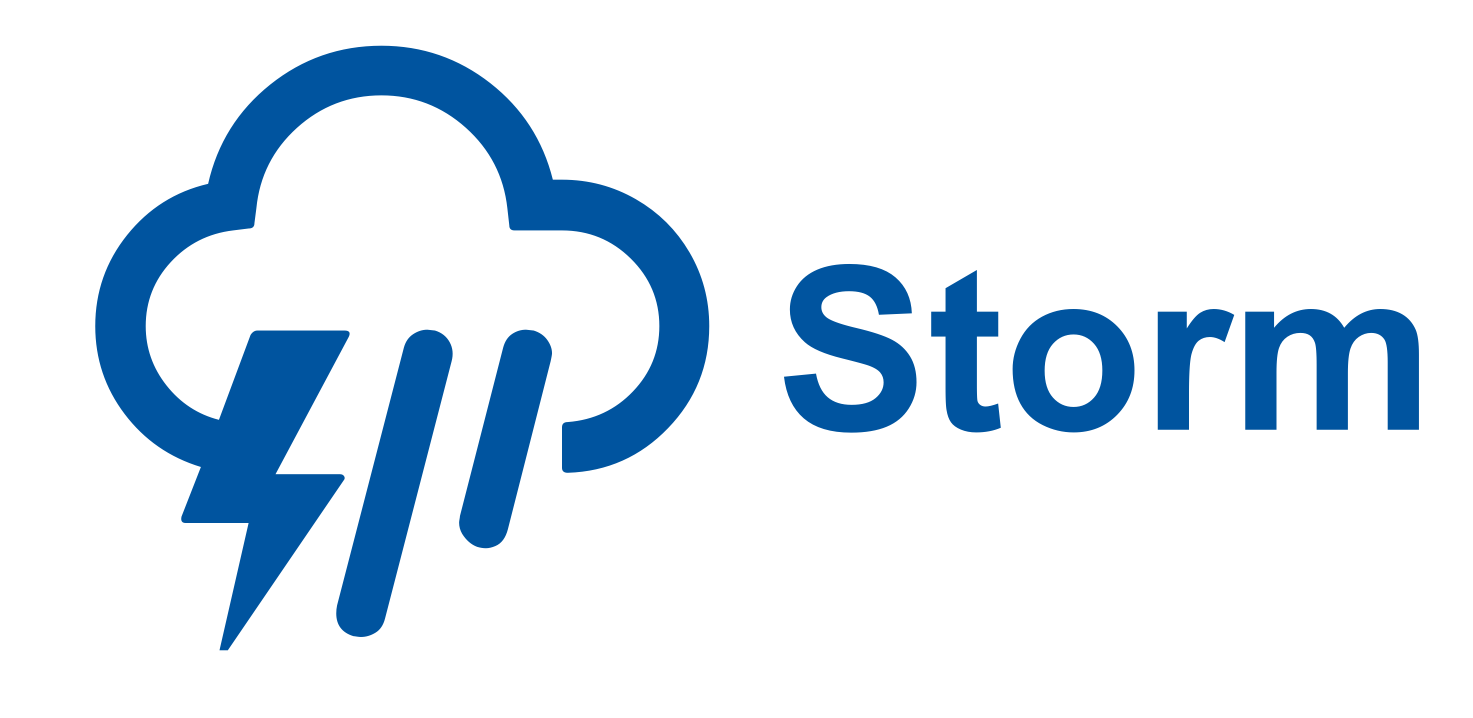</center>

**<center>[www.stormchecker.org](https://www.stormchecker.org)</center>**

<div align="right">Press <em>spacebar</em> to navigate</div>

## Storm
A modern probabilistic model checker
- **State-of-the-art**: best performance at [QComp 2020](http://qcomp.org/competition/2020/index.html)
- **Modular**: dedicated solvers for each task, interchange libraries
- Written in **C++**, **Python interface** via [stormpy](https://moves-rwth.github.io/stormpy/)
- **Open-source**, developed since 2012, over 170,000 lines of code

### Getting Storm
- Native support for *Linux* and *macOS* (homebrew formula)
- Virtual machine and Docker containers (also for *Windows*)

## Getting Storm for this presentation
We use a [Docker container](https://www.docker.com/) based on [Jupyter Notebook](https://jupyter.org/) throughout this presentation.
#### Installation steps:
1. Install [Docker](https://docs.docker.com/get-docker/) for your OS
2. Download (>1 GB) and start the container:
```bash
docker run -it -p 8080:8080 --name stormpyter sjunges/stormpyter:lecture_radboud
```
3. Open the Jupyter website indicated in the command line:
[127.0.0.1:8080/...](http://127.0.0.1:8080)
4. Open file **storm.ipynb**
5. The presentation should start automatically

## Hands-on presentation

- This is an interactive presentation. You can **execute all commands by yourself**!
- Navigate with *spacebar* and *shift+spacebar*
- All interactive commands can be executed with *shift+enter*
- Switch between presentation and notebook with *alt+r*



### Example

In [1]:
!storm

Storm 1.9.0


You should see the Storm version information.

You can even **change the code**! Try adding the flag `--version`.

## Knuth-Yao Die


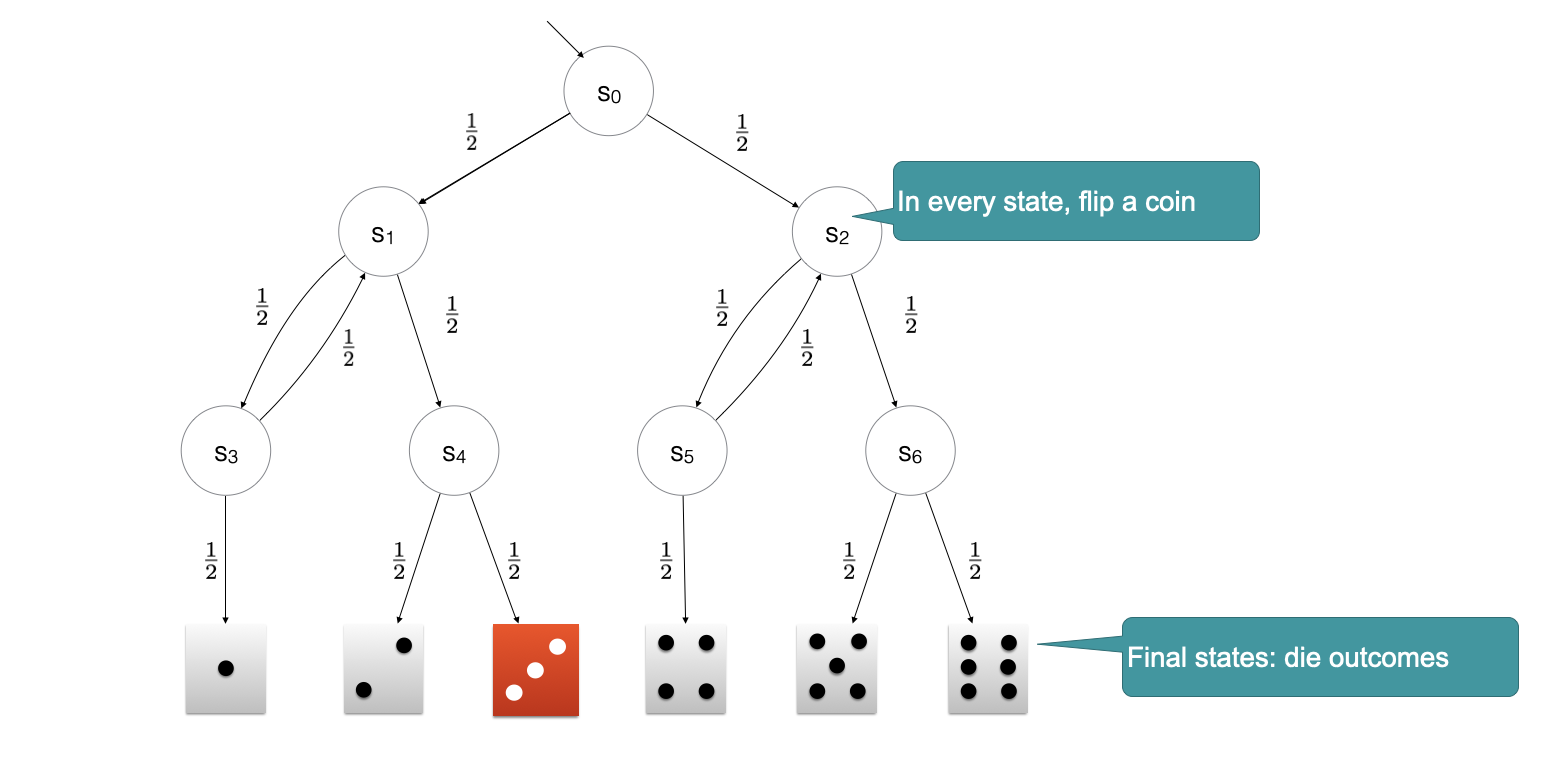

Model dice roll with a fair coin

## Knuth-Yao Die

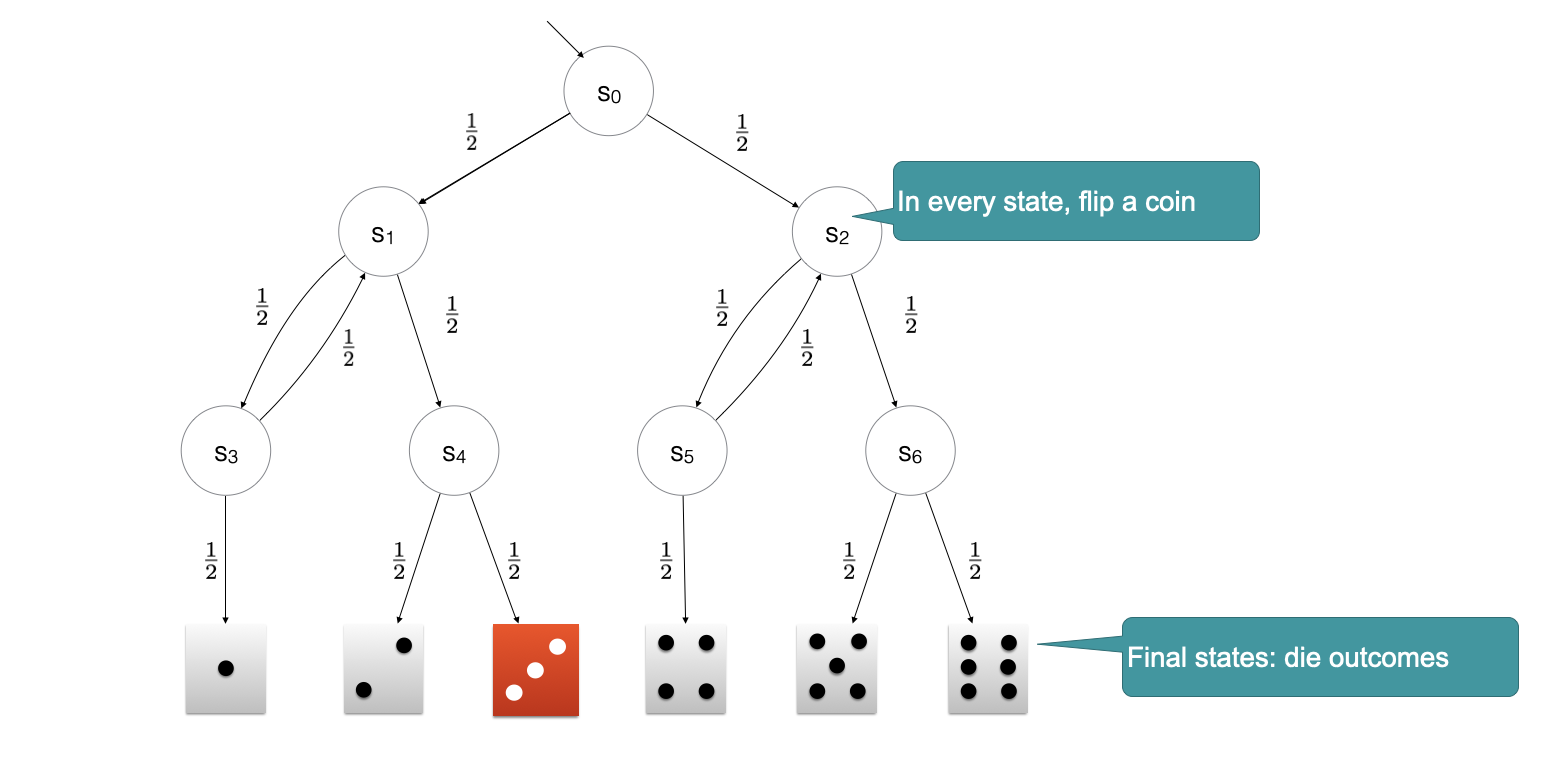

In [6]:
!tail -n+3 examples/kydie.drn

@type: DTMC
@parameters

@reward_models

@nr_states
13
@nr_choices
13
@model
state 0 init
	action 0
		1 : 0.5
		2 : 0.5
state 1
	action 0
		3 : 0.5
		4 : 0.5
state 2
	action 0
		5 : 0.5
		6 : 0.5
state 3
	action 0
		1 : 0.5
		7 : 0.5
state 4
	action 0
		8 : 0.5
		9 : 0.5
state 5
	action 0
		2 : 0.5
		10 : 0.5
state 6
	action 0
		11 : 0.5
		12 : 0.5
state 7 out1 done
	action 0
		7 : 1
state 8 out2 done
	action 0
		8 : 1
state 9 out3 done
	action 0
		9 : 1
state 10 out4 done
	action 0
		10 : 1
state 11 out5 done
	action 0
		11 : 1
state 12 out6 done
	action 0
		12 : 1


## Running Storm on KY-Die

In [7]:
!storm --explicit-drn examples/kydie.drn --buildfull

Storm 1.9.0

Date: Fri Apr  4 13:00:47 2025
Command line arguments: --explicit-drn examples/kydie.drn --buildfull
Current working directory: /app

Time for model construction: 0.017s.

-------------------------------------------------------------- 
Model type: 	DTMC (sparse)
States: 	13
Transitions: 	20
Reward Models:  none
State Labels: 	8 labels
   * out5 -> 1 item(s)
   * out6 -> 1 item(s)
   * out4 -> 1 item(s)
   * out2 -> 1 item(s)
   * out3 -> 1 item(s)
   * done -> 6 item(s)
   * out1 -> 1 item(s)
   * init -> 1 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 


In [8]:
!storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out2" ]'

Storm 1.9.0

Date: Fri Apr  4 13:00:51 2025
Command line arguments: --explicit-drn examples/kydie.drn --prop 'P=? [F "out2" ]'
Current working directory: /app

Time for model construction: 0.016s.

-------------------------------------------------------------- 
Model type: 	DTMC (sparse)
States: 	13
Transitions: 	20
Reward Models:  none
State Labels: 	8 labels
   * out5 -> 1 item(s)
   * out6 -> 1 item(s)
   * out4 -> 1 item(s)
   * out2 -> 1 item(s)
   * out3 -> 1 item(s)
   * done -> 6 item(s)
   * out1 -> 1 item(s)
   * init -> 1 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 

Model checking property "1": P=? [F "out2"] ...
Result (for initial states): 0.1666666667
Time for model checking: 0.016s.


In [9]:
!storm --explicit-drn examples/kydie.drn --prop 'T=? [F "done" ]'

Storm 1.9.0

Date: Fri Apr  4 13:01:05 2025
Command line arguments: --explicit-drn examples/kydie.drn --prop 'T=? [F "done" ]'
Current working directory: /app

Time for model construction: 0.016s.

-------------------------------------------------------------- 
Model type: 	DTMC (sparse)
States: 	13
Transitions: 	20
Reward Models:  none
State Labels: 	8 labels
   * out5 -> 1 item(s)
   * out6 -> 1 item(s)
   * out4 -> 1 item(s)
   * out2 -> 1 item(s)
   * out3 -> 1 item(s)
   * done -> 6 item(s)
   * out1 -> 1 item(s)
   * init -> 1 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 

Model checking property "1": T=? [F "done"] ...
Result (for initial states): 3.666666667
Time for model checking: 0.010s.


## Computing exact values
- Floating point arithmetic and convergence criteria might not be precise  
  &#10140; use exact (rational) numbers and sound algorithms off-the-shelf
- Drawback: performance might decrease

In [10]:
!storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out1"]' | tail -n2

Result (for initial states): 0.1666666667
Time for model checking: 0.010s.


In [11]:
!storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out1"]' --exact | tail -n2

Result (for initial states): 1/6 (approx. 0.1666666667)
Time for model checking: 0.018s.


## Input formats
- Storm supports a variety of input formats:
    - [Prism language](https://www.prismmodelchecker.org/manual/ThePRISMLanguage/Introduction)
    - [Jani modelling language](http://www.jani-spec.org/)
    - Explicit format
    - Generalized stochastic Petri nets

## Intro to Prism format

## KY-die with Prism

naive encoding:
- Variable *s* encodes the state
- Describe an update for every state
- Single module

In [2]:
!tail -n20 examples/kydie-naive.prism

module main
    s : [0..12] init 0;
    [] s=0 -> 0.5:(s'=1) + 0.5:(s'=2);
    [] s=1 -> 0.5:(s'=3) + 0.5:(s'=4);
    [] s=2 -> 0.5:(s'=5) + 0.5:(s'=6);
    [] s=3 -> 0.5:(s'=1) + 0.5:(s'=7);
    [] s=4 -> 0.5:(s'=8) + 0.5:(s'=9);
    [] s=5 -> 0.5:(s'=2) + 0.5:(s'=10);
    [] s=6 -> 0.5:(s'=11) + 0.5:(s'=12);
    [] s>6 -> 1:(s'=s);
endmodule

label "out1" = s=7;
label "out2" = s=8;
label "out3" = s=9;
label "out4" = s=10;
label "out5" = s=11;
label "out6" = s=12;
label "done" = s>=7;



## Single-Module Prism

 - A module contains declarations of (local) variables and commands.
 
 - Commands

  $$
\textbf{[}action\textbf{]}~ \text{guard} ~\textbf{->}~ \text{probability}\textbf{:} \text{update} \textbf{ + }\text{probability}\textbf{:} \text{update} + \dots
  $$

    - *action*: Synchronization label (may be empty)
    - *guard*: Boolean combination of inequalities involving local and global variables
    - *probability*: value between 0 and 1. The probabilities of each command have to sum up to 1.
    - *update*: Assigns new values to (a subset of) the variables. 
    $$\texttt{var}' = f(\texttt{vars})$$



## Operational Semantics for Single-Module Prism

- The *state space* of the induced MDP of a PRISM model is the
  set of all variable assignments.
- The *initial state* is the assignment which assigns to each
    variable its initial value.
- Consider a command $c$
   $$
    [\alpha]\ g\to p_1:f_1 + \cdots + p_n:f_n\,.
    $$

    - $S_c = \{s\in S\,|\,s\vDash g\}$
    - $Steps(s) = \{ (\alpha,\mu_{s,c})\,|\,\forall c\in C: s\in S_c\}$ such that
    $$
    \mu_{c,s}(s')=\sum_{\{i\,|\,1\leq i\leq n\land f_i(s)=s'\}} p_i
    $$

## Gridworld with Prism

- Robot in an N by N grid
- Own position given by x,y
- Up to 4 actions

In [12]:
!cat examples/grid.prism

mdp

const int N;

module main
   x : [0..N] init 3;
   y : [0..N] init 3;

   [north] x > 1 -> 0.9:(x'=x-1) + 0.1:(x'=x);
   [south] x < N -> 0.9:(x'=x+1) + 0.1:(x'=x);
   [west] y > 1 -> 0.8:(y'=y-1) + 0.2:(y'=y);
   [east] y < N -> 0.8:(y'=y+1) + 0.2:(y'=y);
endmodule


## Gridworld with Prism

- Robot in an N by N grid
- Own position given by x,y
- Up to 4 actions

In [7]:
!storm --prism examples/grid.prism -const N=6 

Storm 1.6.4 (dev)

Date: Wed Apr 13 07:29:12 2022
Command line arguments: --prism examples/grid.prism -const N=6
Current working directory: /opt/jupyter/notebooks

Time for model input parsing: 0.070s.

Time for model construction: 0.231s.

-------------------------------------------------------------- 
Model type: 	MDP (sparse)
States: 	36
Transitions: 	240
Choices: 	120
Reward Models:  none
State Labels: 	2 labels
   * deadlock -> 0 item(s)
   * init -> 1 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 


## Extracting Schedulers

In [14]:
!storm --prism examples/grid.prism -const N=6 --prop "Tmin=? [F x=3 & y > 4]" --exportscheduler plain.sched | tail -n8


Model checking property "1": T[exp]min=? [F ((x = 3) & (y > 4))] ...
Exporting scheduler ...  WARN (model-handling.h:1129): No information of state valuations available. The scheduler output will use internal state ids. You might be interested in building the model with state valuations using --buildstateval.
 WARN (model-handling.h:1132): No symbolic choice information is available. The scheduler output will use internal choice ids. You might be interested in building the model with choice labels or choice origins using --buildchoicelab or --buildchoiceorig.
 WARN (model-handling.h:1136): Only partial choice information is available. You might want to build the model with choice origins using --buildchoicelab or --buildchoiceorig.
Write to file plain.sched.
Result (for initial states): 2.5
Time for model checking: 0.011s.


In [17]:
!head -n20 plain.sched

___________________________________________________________________
Fully defined memoryless deterministic scheduler:
model state:    choice(s)
           0    3
           1    3
           2    3
           3    3
           4    3
           5    2
           6    1
           7    3
           8    3
           9    0
          10    3
          11    2
          12    0
          13    0
          14    0
          15    1
          16    1


## Extracting Schedulers

In [18]:
!storm --prism examples/grid.prism -const N=6 --prop "Tmin=? [F x=3 & y > 4]" --exportscheduler high.sched --buildchoicelab --buildstateval | tail -n8

   * west -> 28 item(s)
   * east -> 29 item(s)
-------------------------------------------------------------- 

Model checking property "1": T[exp]min=? [F ((x = 3) & (y > 4))] ...
Exporting scheduler ... Write to file high.sched.
Result (for initial states): 2.5
Time for model checking: 0.012s.


In [19]:
!head -n20 high.sched

___________________________________________________________________
Fully defined memoryless deterministic scheduler:
      model state:    choice(s)
    0: [x=3	& y=3]    3 {east}
    1: [x=2	& y=3]    3 {east}
    2: [x=4	& y=3]    3 {east}
    3: [x=3	& y=2]    3 {east}
    4: [x=3	& y=4]    3 {east}
    5: [x=1	& y=3]    2 {east}
    6: [x=2	& y=2]    1 {south}
    7: [x=2	& y=4]    3 {east}
    8: [x=5	& y=3]    3 {east}
    9: [x=4	& y=2]    0 {north}
   10: [x=4	& y=4]    3 {east}
   11: [x=3	& y=1]    2 {east}
   12: [x=3	& y=5]    0 {}
   13: [x=1	& y=2]    0 {south}
   14: [x=1	& y=4]    0 {south}
   15: [x=2	& y=1]    1 {south}
   16: [x=2	& y=5]    1 {south}


## Engines in Storm
Storm supports different model representations:
- **Sparse matrix**:
    - Model building is time and memory intensive
    - Fast numerical computations
- **Binary Decision Diagrams (BDD)**:
    - Fast and memory efficient model building if model is structured
    - Slower numerical computations
- **Hybrid** approach:
    - Build with BDD, use sparse matrix for numerical computations
- ...

## Engines in Storm

In [3]:
!storm --engine sparse --prism examples/phil-nofair5.nm --prop 'Pmax=? [F no_eat>1]' |tail -n+7

Time for model input parsing: 0.084s.

Time for model construction: 4.262s.

-------------------------------------------------------------- 
Model type: 	MDP (sparse)
States: 	92268
Transitions: 	478900
Choices: 	423450
Reward Models:  none
State Labels: 	3 labels
   * deadlock -> 0 item(s)
   * init -> 1 item(s)
   * ((((((((p1 >= 8) & (p1 <= 9)) ? 1 : 0) + (((p2 >= 8) & (p2 <= 9)) ? 1 : 0)) + (((p3 >= 8) & (p3 <= 9)) ? 1 : 0)) + (((p4 >= 8) & (p4 <= 9)) ? 1 : 0)) + (((p5 >= 8) & (p5 <= 9)) ? 1 : 0)) > 1) -> 2400 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 

Model checking property "1": Pmax=? [F ((((((((p1 >= 8) & (p1 <= 9)) ? 1 : 0) + (((p2 >= 8) & (p2 <= 9)) ? 1 : 0)) + (((p3 >= 8) & (p3 <= 9)) ? 1 : 0)) + (((p4 >= 8) & (p4 <= 9)) ? 1 : 0)) + (((p5 >= 8) & (p5 <= 9)) ? 1 : 0)) > 1)] ...
Result (for initial states): 1
Time for model checking: 0.330s.


In [4]:
!storm --engine dd --prism examples/phil-nofair5.nm --prop 'Pmax=? [F no_eat>1]' --ddlib cudd |tail -n+7

Time for model input parsing: 0.073s.

Time for model construction: 0.135s.

-------------------------------------------------------------- 
Model type: 	MDP (symbolic)
States: 	92268 (218 nodes)
Transitions: 	478900 (3552 nodes)
Choices: 	423450
Reward Models:  none
Variables: 	rows: 5 meta variables (20 DD variables), columns: 5 meta variables (20 DD variables), nondeterminism: 5 meta variables (5 DD variables)
Labels: 	4
   * deadlock -> 0 state(s) (1 nodes)
   * init -> 1 state(s) (21 nodes)
   * eat
   * hungry
-------------------------------------------------------------- 

Model checking property "1": Pmax=? [F ((((((((p1 >= 8) & (p1 <= 9)) ? 1 : 0) + (((p2 >= 8) & (p2 <= 9)) ? 1 : 0)) + (((p3 >= 8) & (p3 <= 9)) ? 1 : 0)) + (((p4 >= 8) & (p4 <= 9)) ? 1 : 0)) + (((p5 >= 8) & (p5 <= 9)) ? 1 : 0)) > 1)] ...
Result (for initial states): 1
Time for model checking: 0.067s.


## Bisimulation minimization
- Reduces state-space size without loosing information
- Exploits symmetries

In [ ]:
!storm --bisimulation --prism examples/phil-nofair3.nm --prop 'filter(forall, P>=1 [F "eat"], "hungry")' |tail -n+7

## Summary
- Basic introduction to **Storm command-line interface**
- Storm supports broad range of **models and properties**
- Different **engines** allow tailored analysis per model and property

### Below: Longer example

### Next:
**Stormpy**: Python bindings for Storm  
&#10140; Easy and rapid prototyping for probabilistic model checking

## Dining philosophers

<center>
    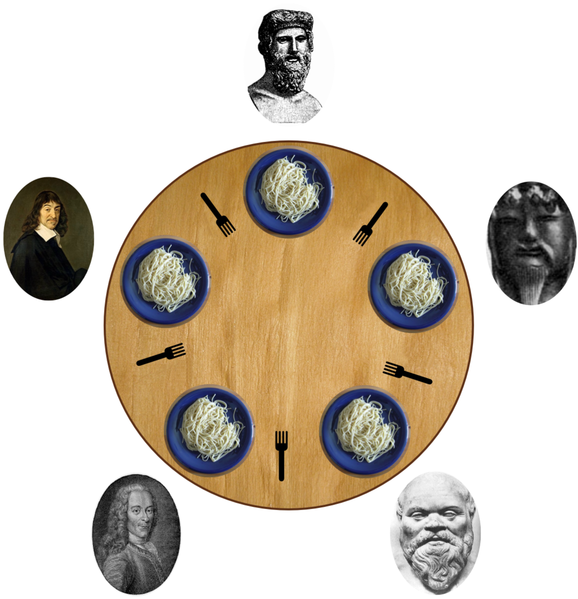
<div style="font-size:10px">Source: <a href="https://en.wikipedia.org/wiki/File:An_illustration_of_the_dining_philosophers_problem.png">Benjamin D. Esham / Wikimedia Commons</a></div>
</center>

- Formulated in 1965 by Edsger Dijkstra
- Philosophers become hungry from thinking
- Every *hungry* philosophers wants to *eat*
- Before eating, pick up *left* and *right fork*

## Dining philosophers

#### Problem
No fully distributed and symmetric *deterministic* algorithm is possible (Lehmann, Rabin 1981)
  - Deadlock if all philosophers first pick up left fork


#### Solution
&#10140; Use *randomized* algorithm

Algorithm by Lehmann and Rabin (POPL'81)
  - Random choice whether first picking left or right fork



## Randomized dining philosophers (Lehmann, Rabin)


1. thinking
2. hungry:
    1. flip coin to choose first fork  
    2. try to pick up first fork
    3. if successful continue, else keep trying
    4. try to pick up second fork
    5. if successful continue, otherwise put down first fork and think again
3. eating
4. put down left and right fork and think again

```
s=0 -> (s'=0); //stay thinking
s=0 -> (s'=1); //trying
// draw randomly
s=1 -> 0.5 : (s'=2) + 0.5 : (s'=3); 
s=2 &  lfree -> (s'=4); //pick up left
s=2 & !lfree -> (s'=2); //left not free
...
```
```
// Finished eating
s=9  -> (s'=10); //put down left 
s=10 -> (s'=0);  //go back to thinking
```
Source: [Prism Website]("https://www.prismmodelchecker.org/casestudies/phil.php")

## Prism file for randomized dining philosophers
- Prism file specifying algorithm for 3 processes.
- Uses multiple parallel modules
- Parallel modules are created by renaming to avoid copy-pasting.

Source: [Prism Website](https://www.prismmodelchecker.org/casestudies/phil.php)

## Building model with Storm

Read prism file for 3 philosophers with Storm:

In [ ]:
!storm --prism examples/phil3.nm --buildfull

## Model checking

- Model: randomized dining philosophers
- Properties:
    - Starvation freedom
    - Mutual exclusion for forks
    - Average waiting time
    - ...

## Model checking DTMC
- Assume scheduling of processes follows uniform distribution  
  &#10140; Yields discrete-time Markov chain (DTMC)

"*Probability that no philosopher is ever hungry*"

In [ ]:
!storm --prism examples/phil3.pm --prop 'P=? [G !"hungry"]'  |tail -n+12

## Model checking DTMC
"*Percentage of time spent eating*"

In [ ]:
!storm --prism examples/phil3.pm --prop 'S=? ["eat"]' |tail -4

## Model checking DTMC
Liveness: "*If a philosopher is hungry then eventually some philosopher eats"*

In [ ]:
!storm --prism examples/phil3.pm --prop 'filter(forall, P>=1 [F "eat"], "hungry")' |tail -4

## Model checking MDP
- Allow arbitrary scheduling of processes now  
  &#10140; Yields Markov decision process (MDP) containing non-determinism

"*(Minimal/Maximal) Probability that no philosopher is ever hungry*"

In [ ]:
!storm --prism examples/phil3.nm --prop 'Pmin=? [G !"hungry"];Pmax=? [G !"hungry"]' |tail -n+12

## Model checking MDP
Liveness: "*If a philosopher is hungry then eventually some philosopher eats"*

In [ ]:
!storm --prism examples/phil3.nm --prop 'filter(forall, P>=1 [F "eat"], "hungry")' |tail -3

## Model checking MDP
**Problem**: unfair schedulers avoid scheduling hungry philosophers  
**Solution**: use adapted algorithm without fairness assumptions (Duflot, Fribourg, Picaronny, 2004)

In [ ]:
!storm --prism examples/phil-nofair3.nm --prop 'filter(forall, P>=1 [F "eat"], "hungry")' |tail -3

## Model checking deterministic algorithm
Consider (wrong) *deterministic* algorithm where always left fork is picked first.  
**Before**: `s=1 -> 0.5 : (s'=2) + 0.5 : (s'=3);`  
**After**: `s=1 -> 1 : (s'=2);`

In [ ]:
!storm --prism examples/phil-nofair-det3.nm --prop 'filter(forall, P>=1 [F "eat"], "hungry")' |tail -3

## Computing waiting times for philosophers
"*Probability that a hungry philosopher eats within 10 steps*"

In [ ]:
!storm --prism examples/phil-nofair3.nm --prop 'filter(min, Pmin=? [F<=10 "eat"], "hungry");filter(avg, Pmin=? [F<=10 "eat"], "hungry")' |tail -7

## Computing waiting times for philosophers
"*Expected number of steps (in the worst-case) that a hungry philosopher needs to take before eating*"

In [ ]:
!storm --prism examples/phil-nofair3.nm --prop 'filter(max, Rmax=? [F "eat"], "hungry")' |tail -3

## Using JANI as input format

In [1]:
!storm --jani examples/phil-nofair3.jani -jprop |tail -7

Model checking property "1": R[exp]{"num_steps"}min=? [F "eat"] ...
Result (for initial states): 4
Time for model checking: 0.027s.

Model checking property "2": R[exp]{"num_steps"}max=? [F "eat"] ...
Result (for initial states): 26.99997261
Time for model checking: 0.009s.
